# Analítica predictiva

## Trabajo final

* David Santiago Cardona Carvajal - C.C.: 1020458212
* Joan Sebastián Granados Valle - C.C.: 1026146461
* Héctor Andrés Hoyos Ceballos - C.C.: 1039466317
* Mariana Moureas - C.C.: 1020464046

### Dependencias

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

import sys
sys.path.append('.')

from custom_modules import corr_matrix_heatmap
from custom_modules import quantitative_var_corr
from custom_modules import quantitative_var_distplot
from custom_modules import categorical_var_histplot
from custom_modules import preprocessing
from custom_modules import grid_cv
from custom_modules import best_regressors
from custom_modules import predict_real_scatterplot
from custom_modules import predict_residuals_scatterplot
from custom_modules import eval_metrics

### Lectura de datos

Seleccionar el origen de datos del dataset y especificar su variable dependiente en la variable "depVar". A continuación, se presentan ejemplos.

In [2]:
# Beijing PM2.5 Data Data Set
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
#depVar = 'pm2.5'

In [3]:
# Metro Interstate Traffic Volume Data Set
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz')
#depVar = 'traffic_volume'

In [4]:
# Concrete Compressive Strength Data Set
#df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
#depVar = 'Concrete compressive strength(MPa, megapascals) '

In [5]:
# 100,000 UK Used Car Data set
#df = pd.read_csv('https://raw.githubusercontent.com/hahoyosce/100000_uk_used_car_data_set/main/toyota.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/hahoyosce/100000_uk_used_car_data_set/main/ford.csv')
#depVar = 'price'

In [6]:
# Rides Uber vs Lyft
df = pd.read_csv('https://raw.githubusercontent.com/hahoyosce/100000_uk_used_car_data_set/main/BD_Rides%20Uber%20vs%20Lyft.csv')
depVar = 'price'

### Análisis exploratorio de datos

#### Muestras del conjunto de datos

In [7]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
20164,2.14,Uber,1543398213025,South Station,West End,29.5,1.0,5bebf0d4-f115-4c7d-94aa-5e902c0cf976,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
20165,2.14,Uber,1543445588168,South Station,West End,NaN,1.0,9a4bfe1a-c603-4ebd-9af9-863de1194639,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
20166,2.14,Uber,1544722214255,South Station,West End,9.0,1.0,aee930bd-e127-49bb-aed8-16a129b1c404,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
20167,2.14,Uber,1543661283292,South Station,West End,9.0,1.0,b9bef9d5-1d54-425d-b8d3-aa90f856be42,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX


#### Información del conjunto de datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20169 entries, 0 to 20168
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          20169 non-null  float64
 1   cab_type          20169 non-null  object 
 2   time_stamp        20169 non-null  int64  
 3   destination       20169 non-null  object 
 4   source            20169 non-null  object 
 5   price             18588 non-null  float64
 6   surge_multiplier  20169 non-null  float64
 7   id                20169 non-null  object 
 8   product_id        20169 non-null  object 
 9   name              20169 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


#### Análisis descriptivo del conjunto de datos

In [9]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,20169.000000,2.016900e+04,18588.000000,20169.000000
mean,2.149499,1.544032e+12,16.433371,1.015023
std,1.123201,6.883485e+08,9.226614,0.094590
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.250000,1.543438e+12,9.000000,1.000000
50%,2.080000,1.543722e+12,13.500000,1.000000
75%,2.860000,1.544815e+12,22.500000,1.000000
max,7.460000,1.545161e+12,80.000000,2.500000


#### Matriz de correlación

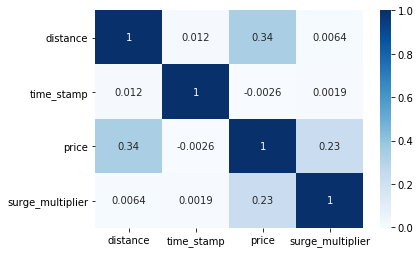

In [10]:
corr_matrix_heatmap(df.corr())

#### Correlación entre las variables

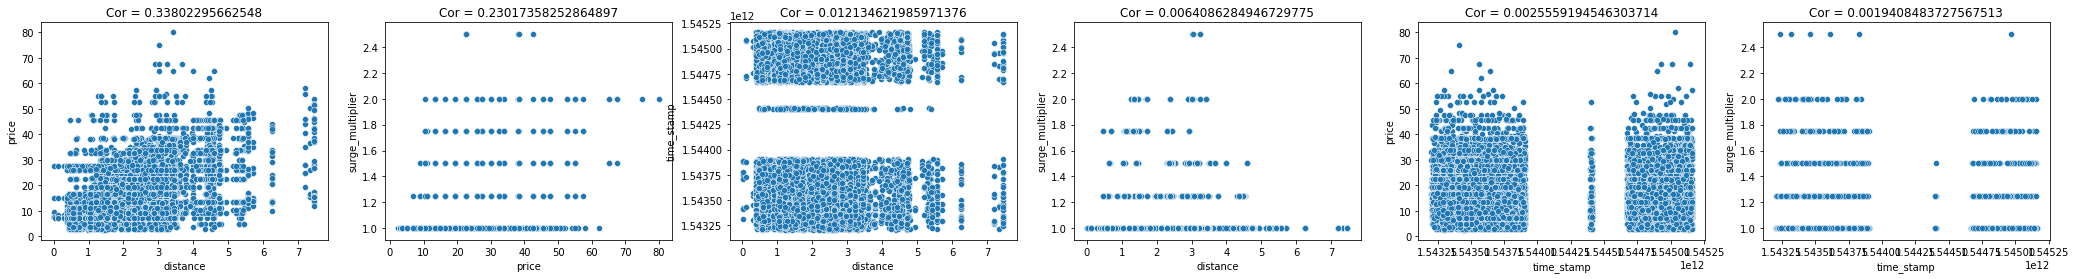

In [11]:
quantitative_var_corr(df, df.corr())

#### Distribución de las variables cuantitativas

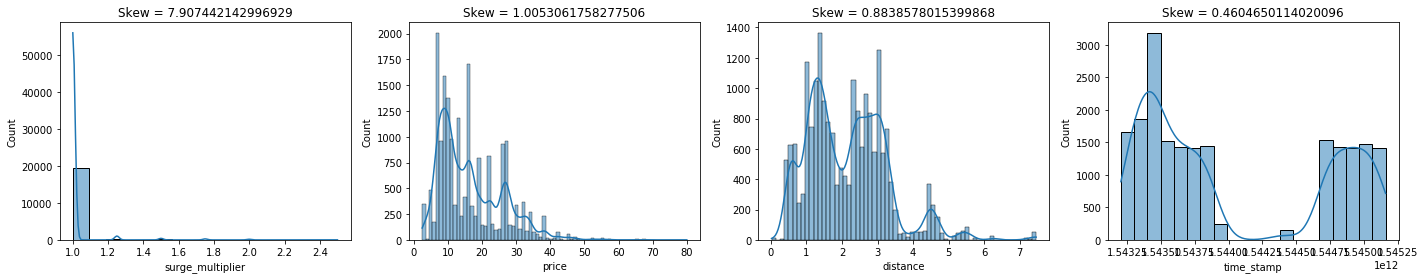

In [12]:
quantitative_var_distplot(df)

#### Ocurrencia de las variables categóricas

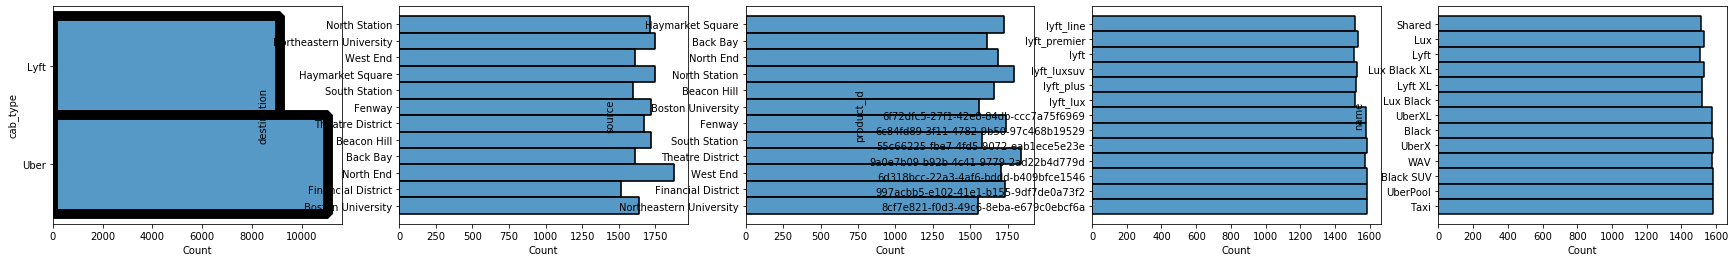

In [13]:
categorical_var_histplot(df)

### Preprocesamiento de los datos

In [14]:
X, y = preprocessing(df, depVar)

print(y)
X

0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
         ... 
20163     9.0
20164    29.5
20166     9.0
20167     9.0
20168    19.5
Name: price, Length: 18588, dtype: float64


,distance,time_stamp,surge_multiplier,cab_type_Lyft,cab_type_Uber,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.056452,0.893757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.056452,0.041074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.056452,0.083386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.056452,0.178825,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056452,0.132719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,0.284946,0.061679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18584,0.284946,0.099428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18585,0.284946,0.776021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18586,0.284946,0.233862,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Modelado de los datos

#### Modelos

In [15]:
# Se crean los conjuntos de entrenamiento y prueba.
testPct = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testPct, random_state=1)

In [16]:
# Se definen los parámetros de los modelos.
knn_parameters = [{
    'n_neighbors': [4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
}]

reg_lin_parameters = [{
    'fit_intercept': [True, False],
}]

bayes_parameters = [{
    'n_iter': [100, 200, 300, 400],
    'tol': [1e-3, 1e-4],
    'alpha_1': [1e-6, 1e-5],
}]

sgd_params = [{
    'alpha' :[0.1, 0.001, 0.00001],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [500, 1000, 2000],
    'penalty': ['l2', 'elasticnet']
}]

parameters = {
    'knn': knn_parameters,
    'reg_lin': reg_lin_parameters,
    'bayes': bayes_parameters,
    'sgd': sgd_params,
}

In [17]:
# Se definen los modelos.
regressors = {
    'knn': KNeighborsRegressor(),
    'reg_lin': LinearRegression(),
    'bayes': BayesianRidge(),
    'sgd': SGDRegressor(),
}

In [18]:
# Se entrenan los modelos anteriormente definidos.
models = {}
for regressor in regressors:
    models[regressor] = grid_cv(X_train, y_train, regressors[regressor], parameters[regressor])

#### Resultados

In [19]:
# Resumen de los mejores modelos por regresor.
best_regressors(regressors, models)

,Best score,Best estimator,Best parameters
knn,0.924423,"KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=10, p=2, weights='distance')","{'n_neighbors': 10, 'weights': 'distance'}"
reg_lin,0.933207,"LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)",{'fit_intercept': False}
bayes,0.933217,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=False, copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=100, normalize=False, tol=0.001, verbose=False)","{'alpha_1': 1e-06, 'n_iter': 100, 'tol': 0.001}"
sgd,0.932627,"SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling', loss='squared_loss', max_iter=500, n_iter_no_change=5, penalty='elasticnet', power_t=0.25, random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)","{'alpha': 1e-05, 'learning_rate': 'invscaling', 'max_iter': 500, 'penalty': 'elasticnet'}"


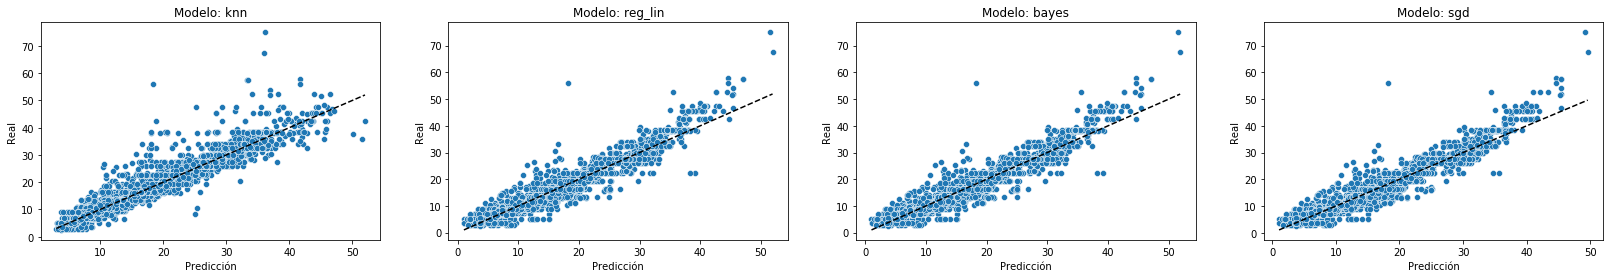

In [20]:
# Gráfico de los valores de predicción respecto de los valores reales.
predicts = predict_real_scatterplot(regressors, models, X_test, y_test)

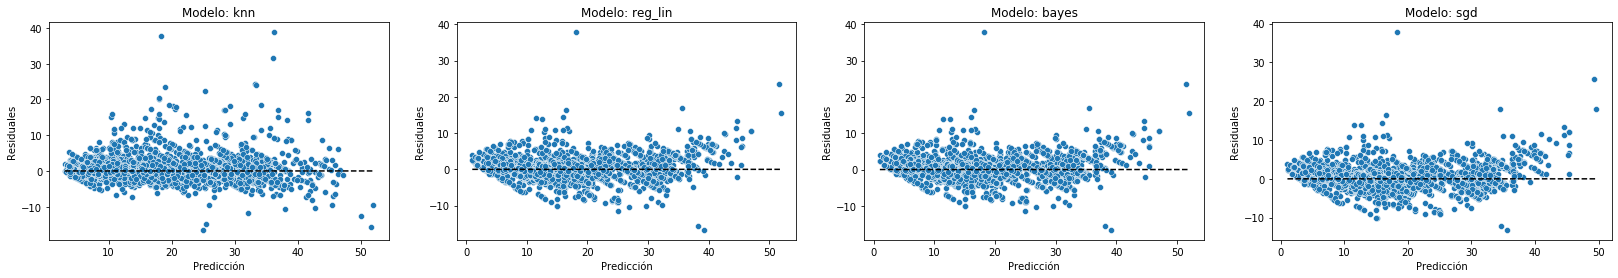

In [21]:
# Gráfico de los valores de predicción respecto de los residuales.
predict_residuals_scatterplot(regressors, models, predicts, y_test)

#### Métricas de evaluación

In [22]:
eval_metrics(regressors, predicts, y_test)

,explained_variance,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
knn,0.921597,38.784157,1.452531,6.620788,0.881202,0.920802
reg_lin,0.930406,37.813232,1.714638,5.818422,1.332764,0.930400
bayes,0.930434,37.812667,1.714472,5.816134,1.333606,0.930428
sgd,0.931051,37.746446,1.716185,5.766928,1.347416,0.931016
